In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as npr
%matplotlib inline
%precision 4

'%.4f'

1. Radioactive decay chain

 decays to 
 with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability 
. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time
Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution 
 
 to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

183.12


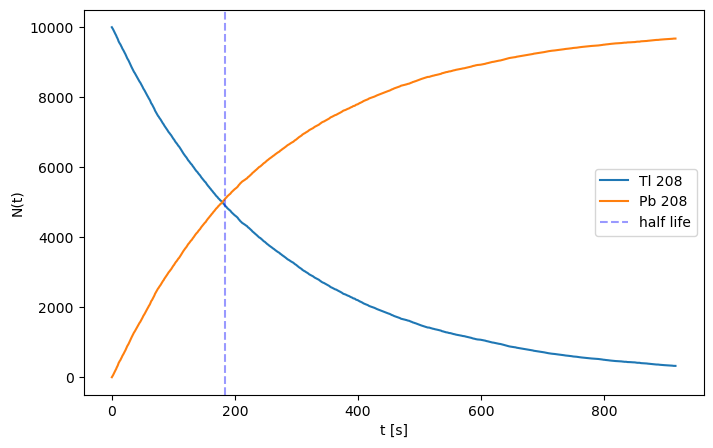

In [5]:
hl = 3.052*60
print(hl)
dt = 1
n = 5
Ttot = int(n*hl)
N_Tl = np.zeros(Ttot)
N_Pb = np.zeros(Ttot)
N_Tl[0] = 10000
N_Pb[0] = 0

def p(t, th=hl):
    return 1 - 2**(-t/th)

time = 0 
prob = npr.uniform(0, 1, int(N_Tl[0]))  
for time in range(1, Ttot):
    N_Pb[time] = np.sum(prob < p(time)) # counts the number of decayed atoms 
    N_Tl[time] = N_Tl[0] - N_Pb[time]

plt.figure(figsize=(8, 5))
x = np.linspace(0, n*hl, N_Tl.size, )
plt.xlabel('t [s]')
plt.ylabel('N(t)')
plt.plot(x, N_Tl, label='Tl 208')
plt.plot(x, N_Pb, label='Pb 208')
plt.axvline(hl, color='b', alpha=0.4, ls='--', label="half life")
plt.legend(loc='best')
plt.show()

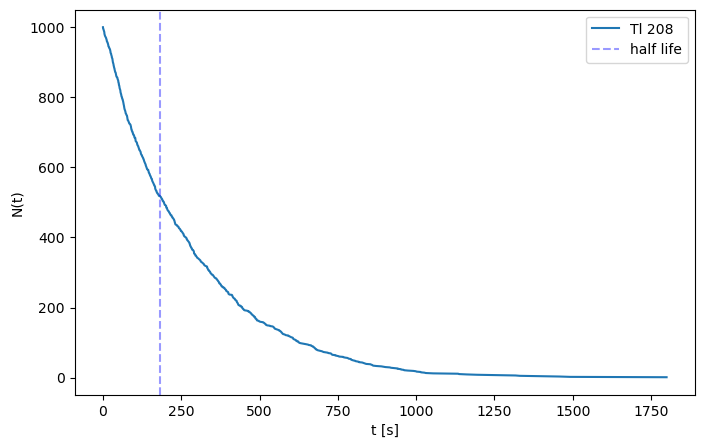

In [6]:
# We have to draw 1000 points from an exponential distribution

tau = hl/np.log(2)

#inverse of exponential distribution cumulative function
def inv_exp(z, mu=1/tau):
    return -np.log(1-z)/mu 

u = np.random.random(1000)
times_of_decay = sorted(inv_exp(u))
N_Tl = np.zeros(len(times_of_decay))
N_Tl[0] = 1000

for t in range(1, len(times_of_decay)):
    N_Tl[t] = N_Tl[t-1] - 1

plt.figure(figsize=(8, 5))
x = np.linspace(0, n*hl, N_Tl.size)
plt.xlabel('t [s]')
plt.ylabel('N(t)')
plt.plot(times_of_decay, N_Tl, label='Tl 208')
plt.axvline(hl, color='b', alpha=0.4, ls='--', label="half life")
#plt.hist(times_of_decay, histtype='step', bins=12, linewidth=2, label='Decay time distribution')
plt.legend(loc='best')
plt.show()

2. Rutherford Scattering

The scattering angle 
 of 
 particles hitting a positively charged nucleus of a Gold atom (
) follows the rule:

 
 
where 
 MeV and 
 beam is the impact parameter. The beam is represented by a 2D gaussian distribution with 
 for both coordinates (
 being the Bohr radius). Assume 1 million 
 particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than 
 (which set a condition on the impact parameter 
)

In [7]:
Bohr_rad = 5e-11 # m 
sigma = Bohr_rad/100
n = int(1e6) # one million alpha particles
E=7.7e6 
eps0=8.85e-12 
e=1.6e-19
Z=79

# generate b from double-gaussian distribution
z = np.random.random(n)
b = np.sqrt(-2*sigma**2*np.log((1-z)))

bounce_back = b[b < Z*e/(2*np.pi*eps0*E)]
print(f"The fraction of particles bouncing back is {(bounce_back.size/n*100)} %")

The fraction of particles bouncing back is 0.1753 %


3. Monte Carlo integration: hit/miss vs mean value method

Consider the function

 
Compute the integral of 
 between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [8]:
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')
def f(x):
    return np.sin(1/(x*(2-x)))**2

a, b = 0, 2

In [9]:
# Hint/miss method

N = 1000000
counts = 0
for _ in range(N):
    x = npr.uniform(0, 2)
    y = npr.uniform(0, 1)
    if y < f(x):
        counts += 1

res = quad(f, a, b)[0]
integral = 2*counts/N
# print(res)
print(f"The estimated area is {integral}, with an error of {np.abs(integral-res)/res*100} %")

The estimated area is 1.452006, with an error of 0.02192269093105174 %


In [11]:
# Mean value method

eps = 1e-5
integral2 = (b-a)* sum([f(x) for x in npr.random(N)])/N
print(f"The estimated area is {integral2}, with an error of {np.abs(integral2-res)/res*100} %")
print(f"Compared with the previous result it differs by {np.abs(integral-integral2)/integral*100} %")

The estimated area is 1.4512717519209266, with an error of 0.028656235465281253 %
Compared with the previous result it differs by 0.050567840564935435 %


4. Monte Carlo integration in high dimension

Start of by computing the area of a circle of unit radius, by integrating the function
 
Generalize the result for a 10D sphere

In [15]:
N = int(1e6)
count = 0
for i in range(N):
    x = npr.uniform(0, 1)
    y = npr.uniform(0, 1)
    r = x**2 + y**2
    if r <= 1: count += 1
area = 4*count/N    # the factor 4 is due to the fact that we are considering just a quarter of the entire circle
print(f"The estimated area is {area} \nThe theoretical area is {np.pi}\nError:{np.abs(area-np.pi)/np.pi}%")

The estimated area is 3.143924 
The theoretical area is 3.141592653589793
Error:0.0007420906104879941%


In [16]:
# Generalizing to a 10D sphere
from scipy import special

N = int(1e6)
dim = 10
count = 0
for i in range(N):
    x = npr.uniform(0, 1, size=dim)    # 10 elements as a vector
    r = sum(x**2)
    if r <= 1: count += 1
V = (2**dim)*count/N   # the factor 4 is due to the fact that we are considering just a quarter of the entire circle in 2D
ThV = np.pi**(dim/2)/special.gamma(dim/2+1)
print(f"The estimated volume is {V} \nThe theoretical volume is {ThV}\nError:{np.abs(V-ThV)/ThV}%")

The estimated volume is 2.59584 
The theoretical volume is 2.550164039877345
Error:0.017910989022044133%


5. Monte Carlo integration with importance sampling

Calculate the value of the integral:

 
using the importance sampling method with 
. You should get a result about 0.84

In [65]:
def f(x):
    return (x**(-0.5))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

N = 100000
a, b = 0, 1
x = npr.random(N)
integral_w = (b-a)*np.sum(w(x))/N

y = npr.random(N)**2 # I need to find random variables distributed with pdf(x)=w(x)
                     # so I apply the inverse CDF to uniformely distributed random variables
I = sum(f(y)/w(y))/N*integral_w
print(f"The integral value is I = {I}")

The integral value is I = 0.8378947338764116
